In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("feat_25.csv")

In [3]:
df.head()

,1,2,3,4,5,6,7,8,9,10,...,17,18,19,20,21,22,23,24,25,class
0,1.977852,-0.346314,-0.570131,0.195685,-0.537241,0.126797,-0.274765,-1.103073,-1.278260,1.511290,...,-0.062213,-0.578102,-1.330746,-0.080511,0.859483,-0.270657,0.691702,-1.398070,1.174889,0
1,1.613268,0.222368,2.413506,-0.297182,-0.636701,1.581054,-0.016959,1.798778,1.045940,0.576654,...,0.124139,-0.095510,-0.703692,2.073224,0.806465,1.295816,1.041119,0.305158,-0.494254,0
2,2.488947,-0.155082,-0.977093,0.582125,-1.043786,-0.980330,1.193903,-0.953012,0.002710,0.289364,...,1.129174,-0.734398,-1.701867,0.146096,1.633311,0.210991,0.588574,0.043234,0.998827,0
3,1.606905,-1.352302,-1.413311,0.527138,-2.009455,-1.938931,0.002983,-0.616852,-1.219592,-0.797112,...,-0.222080,-0.310110,2.025611,-1.902873,-0.760754,1.043425,-2.082864,0.233015,-1.243373,0
4,0.566573,0.313999,0.132044,-1.281047,0.191348,0.922912,0.109798,1.494402,-0.856606,0.027243,...,-0.088047,-0.090599,-0.987043,1.001203,1.398321,-0.235463,-1.505669,1.464694,0.216427,0


In [4]:
df.columns

Index(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13',
       '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25',
       'class'],
      dtype='object')

In [5]:
df['class'].unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

C:\Users\B P Patel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


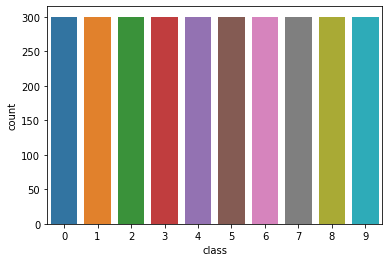

In [6]:
sns.countplot('class',data=df)
plt.show()

In [7]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,classification_report

In [8]:
# for class label '0'
features1 = df.iloc[0:300,:25]
labels1 = df.iloc[0:300,25:]
df1= pd.concat([features1,labels1],axis=1)
df1 = df1.reindex(np.random.permutation(df1.index))

# for class label '1'
features2 = df.iloc[300:600,:25]
labels2 = df.iloc[300:600,25:]
df2= pd.concat([features2,labels2],axis=1)
df2 = df2.reindex(np.random.permutation(df2.index))

In [9]:
# df1

,1,2,3,4,5,6,7,8,9,10,...,17,18,19,20,21,22,23,24,25,class
87,1.747845,-0.333162,0.216835,-0.466235,-0.937435,-0.075794,0.596548,-0.372813,-2.293972,-0.076439,...,1.136980,0.934861,-0.812932,-0.252884,-0.305135,-0.063763,0.829716,-0.185170,-0.506153,0
154,0.984103,-0.244275,0.215319,0.049030,-2.442785,0.281603,-1.378010,-0.654622,-0.967402,-0.047145,...,-0.869049,0.398358,0.681122,-0.523527,0.587175,-0.185349,-0.333442,-0.212942,-0.219655,0
182,2.072664,-0.381203,1.246662,-1.303820,-1.766978,1.260860,-1.228947,0.346562,-0.527951,0.208226,...,-1.102785,-0.939893,0.259029,1.037350,0.546937,-0.654530,0.007191,0.289689,0.051833,0
67,1.693414,-0.510273,1.088665,-1.145955,-2.414188,1.173394,-0.890167,0.230481,0.768482,-0.245739,...,-1.149028,-1.691784,0.745662,-0.805417,0.965230,-0.995266,-0.081629,0.360819,0.720136,0
55,1.815164,2.162170,1.536615,1.023588,0.108153,-0.136554,0.825515,0.538671,4.277149,-1.248432,...,-1.861822,0.743639,-1.633052,0.234543,-1.509550,1.261211,-2.262638,1.143696,-0.704671,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,2.478896,0.061802,0.402953,0.302194,-2.782984,-1.111142,1.594351,-0.893003,1.908376,-2.242434,...,1.706512,-1.094362,0.494014,-1.849886,-0.614949,-0.222127,-0.854785,-0.739661,0.610760,0
41,2.309177,-0.460133,0.229852,0.013116,-2.474961,-0.547118,0.028087,-1.011659,-0.577100,-1.899722,...,1.199286,-0.030863,1.151186,-0.241638,-0.792307,0.474895,-1.023382,0.028454,-0.277014,0
76,2.665016,-0.325666,-0.404863,0.559592,-0.966630,-0.082378,0.397017,-1.812177,-0.892207,0.022709,...,0.933058,0.136641,-1.251167,0.156349,-0.414604,-0.364056,0.288708,-0.177144,1.183019,0
74,1.781842,0.065275,-1.793504,1.900296,0.042917,-0.937002,2.252363,-0.734497,1.124418,0.031540,...,1.334351,-1.948541,1.573954,0.748003,0.566267,-2.109345,1.610655,0.928373,-1.184949,0


In [10]:
# df2

,1,2,3,4,5,6,7,8,9,10,...,17,18,19,20,21,22,23,24,25,class
595,-1.709944,-1.152763,0.232500,0.096390,-0.736188,-0.484059,0.821538,-0.467094,1.040273,0.296623,...,-0.289543,0.771227,0.424428,0.342423,-0.005113,-0.144907,-0.174283,-0.114781,1.079039,1
328,-1.457676,-1.072053,0.025710,0.754080,-0.671669,-0.900273,-1.335695,0.061437,0.810226,0.051954,...,0.293854,-1.090857,-0.245443,0.733156,-0.566900,-0.434369,-0.525803,-0.485109,-0.932323,1
384,-1.549766,-0.894609,0.015310,0.324806,-0.642533,1.155069,0.831014,-0.566168,0.399619,-1.354764,...,-0.206804,1.443617,-0.032147,-0.517905,0.493830,-1.047127,1.299275,-0.674473,0.089514,1
553,-1.296242,-1.522510,0.431047,0.334726,-0.083345,-1.237015,-1.602865,0.502355,1.646342,-0.500148,...,0.250050,-1.178941,-0.436308,1.148235,-0.103818,0.080901,0.056019,-1.060037,-0.692340,1
443,-1.435168,-1.007427,0.081758,0.448234,-0.243468,-1.431007,-1.552629,0.370524,1.016240,-0.005771,...,0.138051,-1.233064,-0.720831,0.077757,-0.835039,-0.283704,-0.430335,-0.630142,-1.058167,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
511,-1.562947,-1.140912,0.208032,0.386014,-0.511296,0.688505,1.355813,-0.454386,0.517823,-0.677528,...,0.238853,0.952314,0.375689,-0.396172,0.596606,-0.836538,0.649824,-0.517365,0.661158,1
353,-1.583681,-0.827709,0.050607,1.035632,-1.352972,0.162953,0.336354,-0.544300,0.161798,0.366745,...,0.453158,0.450275,-0.286872,-0.412513,0.499276,0.007984,0.717352,0.229280,0.398875,1
332,-1.076473,-0.052674,-0.705642,0.529117,-0.904360,0.983607,-0.040204,-0.539643,-1.523779,-0.594130,...,-0.776648,-0.241497,-0.605353,-0.156378,0.048930,-0.693048,-0.035370,-0.083618,-0.226684,1
400,-1.637417,-1.487078,0.445296,0.545887,0.012030,-0.743437,-0.157589,-0.100941,1.729583,-0.006598,...,0.335000,0.613836,0.363545,0.390321,-0.864346,0.133719,-0.258192,-0.642357,0.041738,1


In [11]:
train1, test1 = np.split(df1.sample(frac=1,random_state =101), [int(.8 * len(df1))])
train2, test2 = np.split(df2.sample(frac=1,random_state =101), [int(.8 * len(df2))])

In [12]:
train = pd.concat([train1,train2])
test = pd.concat([test1,test2])

In [15]:
train_features = np.array(train.iloc[:, :25])
train_labels = np.array(train.iloc[:,25:])

test_features = np.array(test.iloc[:, :25])
test_labels = np.array(test.iloc[:,25:])

In [16]:
scaler = StandardScaler()
scaled_train_features = scaler.fit_transform(train_features)
scaled_test_features = scaler.transform(test_features)

In [17]:
cross_val = StratifiedKFold(n_splits = 6)
svc = SVC()
param_grid = {'C':[0.001,0.01,0.1,0.5,0.8,1,5,10,50],'kernel':['rbf','poly','sigmoid','linear'],'gamma': ['scale','auto',0.001,0.01, 0.1,0.3,0.5,0.7,0.9,1], 'degree':np.arange(1,10)}
grid = GridSearchCV(svc,param_grid,cv =cross_val)
grid.fit(scaled_train_features,train_labels.ravel())

GridSearchCV(cv=StratifiedKFold(n_splits=6, random_state=None, shuffle=False),
             estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 0.8, 1, 5, 10, 50],
                         'degree': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 0.3, 0.5,
                                   0.7, 0.9, 1],
                         'kernel': ['rbf', 'poly', 'sigmoid', 'linear']})

In [18]:
grid.best_params_

{'C': 0.01, 'degree': 1, 'gamma': 0.9, 'kernel': 'poly'}

In [19]:
best_score = grid.best_score_

In [20]:
best_score

0.9979166666666667

In [21]:
from sklearn.metrics import confusion_matrix,classification_report

In [22]:
grid_pred = grid.predict(scaled_test_features)

In [27]:
grid.score(test_features,test_labels.ravel())

1.0

In [23]:
confusion_matrix(test_labels,grid_pred)

array([[60,  0],
       [ 0, 60]], dtype=int64)

In [24]:
print(classification_report(test_labels,grid_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       1.00      1.00      1.00        60

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



## For class labels 5 and 9

In [28]:
# for class label '5'
features1 = df.iloc[1500:1800,:25]
labels1 = df.iloc[1500:1800,25:]
df1= pd.concat([features1,labels1],axis=1)
df1 = df1.reindex(np.random.permutation(df1.index))

# for class label '9'
features2 = df.iloc[2700:3000,:25]
labels2 = df.iloc[2700:3000,25:]
df2= pd.concat([features2,labels2],axis=1)
df2 = df2.reindex(np.random.permutation(df2.index))

In [31]:
train1, test1 = np.split(df1.sample(frac=1,random_state =101), [int(.8 * len(df1))])
train2, test2 = np.split(df2.sample(frac=1,random_state =101), [int(.8 * len(df2))])

In [32]:
train = pd.concat([train1,train2])
test = pd.concat([test1,test2])

In [35]:
train_features = np.array(train.iloc[:, :25])
train_labels = np.array(train.iloc[:,25:])

test_features = np.array(test.iloc[:, :25])
test_labels = np.array(test.iloc[:,25:])

In [36]:
scaler = StandardScaler()
scaled_train_features = scaler.fit_transform(train_features)
scaled_test_features = scaler.transform(test_features)

In [39]:
# Previous optimized hyperparameters for class 1 and 2
cross_val = StratifiedKFold(n_splits = 6)
svc = SVC()
param_grid = {'C':[0.01],'kernel':['poly'],'gamma': [0.9], 'degree':[1]}
grid = GridSearchCV(svc,param_grid,cv =cross_val)
grid.fit(scaled_train_features,train_labels.ravel())
grid_pred = grid.predict(scaled_test_features)
acc= grid.score(scaled_test_features,np.array(test_labels).reshape(-1,1))
print(f'Validation accuracy = {grid.best_score_}, Test accuracy = {acc}')

Validation accuracy = 0.9770833333333332, Test accuracy = 0.9583333333333334


In [40]:
cross_val = StratifiedKFold(n_splits = 6)
svc = SVC()
param_grid = {'C':[0.001,0.01,0.1,0.5,0.8,1,5,10,50,100,500],'kernel':['rbf','poly','sigmoid','linear'],'gamma': ['scale','auto',0.001,0.01, 0.1,0.3,0.5,0.7,0.9,1], 'degree':np.arange(1,10)}
grid = GridSearchCV(svc,param_grid,cv =cross_val)
grid.fit(scaled_train_features,train_labels.ravel())
grid_pred = grid.predict(scaled_test_features)
print(f'Best Parameters = {grid.best_params_}, Best score = {grid.best_score_}')

Best Parameters = {'C': 10, 'degree': 1, 'gamma': 0.01, 'kernel': 'rbf'}, Best score = 0.9937499999999999


In [45]:
cross_val = StratifiedKFold(n_splits = 6)
svc = SVC()
param_grid = {'C':[10],'kernel':['rbf'],'gamma': [0.01], 'degree':[1]}
grid = GridSearchCV(svc,param_grid,cv =cross_val)
grid.fit(scaled_train_features,train_labels.ravel())
grid_pred = grid.predict(scaled_test_features)
acc= grid.score(scaled_test_features,np.array(test_labels).reshape(-1,1))
print(f'Validation accuracy = {grid.best_score_}, Test accuracy = {acc}')
print('Confusion Matrix')
print(confusion_matrix(test_labels,grid_pred))
print('Classification Report')
print(classification_report(test_labels,grid_pred))

Validation accuracy = 0.9937499999999999, Test accuracy = 0.9666666666666667
Confusion Matrix
[[60  0]
 [ 4 56]]
Classification Report
              precision    recall  f1-score   support

           5       0.94      1.00      0.97        60
           9       1.00      0.93      0.97        60

    accuracy                           0.97       120
   macro avg       0.97      0.97      0.97       120
weighted avg       0.97      0.97      0.97       120



## For class labels 3 and 7

In [46]:
# for class label '3'
features1 = df.iloc[900:1200,:25]
labels1 = df.iloc[900:1200,25:]
df1= pd.concat([features1,labels1],axis=1)
df1 = df1.reindex(np.random.permutation(df1.index))

# for class label '7'
features2 = df.iloc[2100:2400,:25]
labels2 = df.iloc[2100:2400,25:]
df2= pd.concat([features2,labels2],axis=1)
df2 = df2.reindex(np.random.permutation(df2.index))

In [47]:
train1, test1 = np.split(df1.sample(frac=1,random_state =101), [int(.8 * len(df1))])
train2, test2 = np.split(df2.sample(frac=1,random_state =101), [int(.8 * len(df2))])

In [48]:
train = pd.concat([train1,train2])
test = pd.concat([test1,test2])

In [49]:
train_features = np.array(train.iloc[:, :25])
train_labels = np.array(train.iloc[:,25:])

test_features = np.array(test.iloc[:, :25])
test_labels = np.array(test.iloc[:,25:])

In [50]:
scaler = StandardScaler()
scaled_train_features = scaler.fit_transform(train_features)
scaled_test_features = scaler.transform(test_features)

In [51]:
cross_val = StratifiedKFold(n_splits = 6)
svc = SVC()
param_grid = {'C':[10],'kernel':['rbf'],'gamma': [0.01], 'degree':[1]}
grid = GridSearchCV(svc,param_grid,cv =cross_val)
grid.fit(scaled_train_features,train_labels.ravel())
grid_pred = grid.predict(scaled_test_features)
acc= grid.score(scaled_test_features,np.array(test_labels).reshape(-1,1))
print(f'Validation accuracy = {grid.best_score_}, Test accuracy = {acc}')
print('Confusion Matrix')
print(confusion_matrix(test_labels,grid_pred))
print('Classification Report')
print(classification_report(test_labels,grid_pred))

Validation accuracy = 0.9812499999999998, Test accuracy = 0.975
Confusion Matrix
[[58  2]
 [ 1 59]]
Classification Report
              precision    recall  f1-score   support

           3       0.98      0.97      0.97        60
           7       0.97      0.98      0.98        60

    accuracy                           0.97       120
   macro avg       0.98      0.97      0.97       120
weighted avg       0.98      0.97      0.97       120



In [52]:
cross_val = StratifiedKFold(n_splits = 6)
svc = SVC()
param_grid = {'C':[0.001,0.01,0.1,0.5,0.8,1,5,10,50,100,500],'kernel':['rbf','poly','sigmoid','linear'],'gamma': ['scale','auto',0.001,0.01, 0.1,0.3,0.5,0.7,0.9,1], 'degree':np.arange(1,10)}
grid = GridSearchCV(svc,param_grid,cv =cross_val)
grid.fit(scaled_train_features,train_labels.ravel())
grid_pred = grid.predict(scaled_test_features)
print(f'Best Parameters = {grid.best_params_}, Best score = {grid.best_score_}')

Best Parameters = {'C': 0.1, 'degree': 4, 'gamma': 0.1, 'kernel': 'poly'}, Best score = 0.9854166666666667


In [53]:
cross_val = StratifiedKFold(n_splits = 6)
svc = SVC()
param_grid = {'C':[0.1],'kernel':['poly'],'gamma': [0.1], 'degree':[4]}
grid = GridSearchCV(svc,param_grid,cv =cross_val)
grid.fit(scaled_train_features,train_labels.ravel())
grid_pred = grid.predict(scaled_test_features)
acc= grid.score(scaled_test_features,np.array(test_labels).reshape(-1,1))
print(f'Validation accuracy = {grid.best_score_}, Test accuracy = {acc}')
print('Confusion Matrix')
print(confusion_matrix(test_labels,grid_pred))
print('Classification Report')
print(classification_report(test_labels,grid_pred))

Validation accuracy = 0.9854166666666667, Test accuracy = 0.9916666666666667
Confusion Matrix
[[60  0]
 [ 1 59]]
Classification Report
              precision    recall  f1-score   support

           3       0.98      1.00      0.99        60
           7       1.00      0.98      0.99        60

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120



## 2 features and 2 labels

In [63]:
# for class label '0'
features1 = df.iloc[0:300,:2]
labels1 = df.iloc[0:300,25:]
df1= pd.concat([features1,labels1],axis=1)
df1 = df1.reindex(np.random.permutation(df1.index))

# for class label '1'
features2 = df.iloc[300:600,:2]
labels2 = df.iloc[300:600,25:]
df2= pd.concat([features2,labels2],axis=1)
df2 = df2.reindex(np.random.permutation(df2.index))

In [64]:
df1

,1,2,class
296,1.455873,0.134707,0
128,2.280504,-0.005938,0
92,1.712030,-0.076787,0
245,2.045876,0.363635,0
104,1.362481,0.109544,0
...,...,...,...
63,3.068619,-0.726251,0
121,2.744063,-1.021786,0
135,1.443360,-0.737314,0
270,1.242338,-0.324372,0


In [65]:
train1, test1 = np.split(df1.sample(frac=1,random_state =101), [int(.8 * len(df1))])
train2, test2 = np.split(df2.sample(frac=1,random_state =101), [int(.8 * len(df2))])

In [66]:
train = pd.concat([train1,train2])
test = pd.concat([test1,test2])

In [60]:
test

,1,2,class
281,2.130857,-0.100996,0
173,1.419544,-0.358314,0
132,0.770864,-0.521392,0
7,2.102433,0.031957,0
167,1.388770,-0.410440,0
...,...,...,...
407,-1.355548,-1.653628,1
518,-1.480355,-1.775653,1
560,-1.612893,-0.998344,1
524,-1.594173,-1.464701,1


<AxesSubplot:>

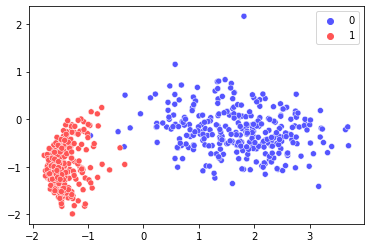

In [81]:
x_ = np.array(df.iloc[:600,0])
y_ = np.array(df.iloc[:600,1])
hu = np.array(df.iloc[0:600,25])
sns.scatterplot(x=x_,y=y_,hue=hu,palette='seismic')

In [70]:
train_features = np.array(train.iloc[:, :2])
train_labels = np.array(train.iloc[:,2:])

test_features = np.array(test.iloc[:, :2])
test_labels = np.array(test.iloc[:,2:])

In [73]:
scaler = StandardScaler()
scaled_train_features = scaler.fit_transform(train_features)
scaled_test_features = scaler.transform(test_features)

In [74]:
cross_val = StratifiedKFold(n_splits = 6)
svc = SVC()
param_grid = {'C':[0.001,0.01,0.1,0.5,0.8,1,5,10,50,100,500],'kernel':['rbf','poly','sigmoid','linear'],'gamma': ['scale','auto',0.001,0.01, 0.1,0.3,0.5,0.7,0.9,1], 'degree':np.arange(1,10)}
grid = GridSearchCV(svc,param_grid,cv =cross_val)
grid.fit(scaled_train_features,train_labels.ravel())
grid_pred = grid.predict(scaled_test_features)
print(f'Best Parameters = {grid.best_params_}, Best score = {grid.best_score_}')

Best Parameters = {'C': 0.01, 'degree': 1, 'gamma': 'scale', 'kernel': 'poly'}, Best score = 0.9958333333333332


In [120]:
cross_val = StratifiedKFold(n_splits = 6)
svc = SVC()
param_grid = {'C':[1],'kernel':['poly'],'gamma': ['scale'], 'degree':[1]}
grid = GridSearchCV(svc,param_grid,cv =cross_val)
grid.fit(scaled_train_features,train_labels.ravel())
grid_pred = grid.predict(scaled_test_features)
print(f'Best Parameters = {grid.best_params_}, Best score = {grid.best_score_}')

Best Parameters = {'C': 1, 'degree': 1, 'gamma': 'scale', 'kernel': 'poly'}, Best score = 0.9958333333333332


In [122]:
# cross_val = StratifiedKFold(n_splits = 6)
svc = SVC(C = 1,kernel = 'poly',gamma= 'scale',degree=1)
svc.fit(scaled_train_features,train_labels.ravel())
pred = svc.predict(scaled_test_features)
print('Confusion Matrix')
print(confusion_matrix(test_labels,pred))
print('Classification Report')
print(classification_report(test_labels,pred))

Confusion Matrix
[[59  1]
 [ 0 60]]
Classification Report
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        60
           1       0.98      1.00      0.99        60

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120



In [123]:
def plot_svm_boundary(model,X,y):
    
    X = X.values
    y = y.values
    
    # Scatter Plot
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30,cmap='seismic')

    
    # plot the decision function
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model.decision_function(xy).reshape(XX.shape)

    # plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    # plot support vectors
    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
               linewidth=1, facecolors='none', edgecolors='k')
    plt.show()

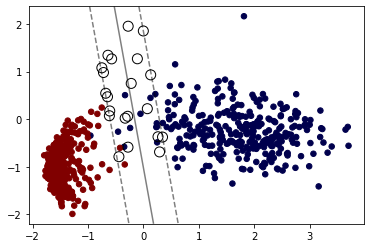

In [124]:
X = df.iloc[:600,:2]
y = df.iloc[:600,25]
plot_svm_boundary(svc,X,y)

In [ ]:
grid.